## Necessary imports

In [154]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# mpl soccer imports
from mplsoccer import Pitch, VerticalPitch, Sbopen, FontManager
from mplsoccer.dimensions import center_scale_dims
from mplsoccer.utils import FontManager


import plotly.graph_objects as go
from PIL import Image
import io


import json
import streamlit as st

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import FunctionTransformer

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

import os
import sys
sys.path.append(os.path.abspath("../src"))

from preprocessing_utils import clean_categories
import requests
from pandas import json_normalize

## Use the sportmonks api EPL free trial and get all EPL matches between 2020/2021 to 2024/2025 seasons. 5 years of Seasons

## 2024 Season

In [155]:
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"

# ID = 23614 # 2024/2025

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2024 = response.json()
#     # Print formatted response data
#     print(data2024)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

#### Get the fixtures info from the requests into a dataframe

In [156]:
# fixtures = []
# for season in data2024['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2024 = pd.DataFrame(fixtures)
# fixtures_df2024

#### Create a list of all fixtures in this season

In [157]:
# epl_fixtures2024 = []
# for fixture in fixtures_df2024['fixture_id']:
#     epl_fixtures2024.append(fixture)
# epl_fixtures2024


#### Gather weather data for all fixtures: Takes a minute

In [158]:
# import time

# # Your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2024 = []

# # Loop through each fixture
# for fixture_id in epl_fixtures2024:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2024.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2024 = pd.DataFrame(weather_data2024)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2024.head()


#### Gather venues data 

In [159]:
# # venues data
# ID = 23614 # 2024/2025
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2024 = response.json()
#     # Print formatted response data
#     print(venue_data2024)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2024 = pd.DataFrame(venue_data2024["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2024.head()


#### Rename id to match fixture_id and merge all dataframes into full_fixtures2023

In [160]:
# venue_df2024 = venue_df2024.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2024['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2024 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df = fixtures_df2024.merge(participants_df2024, on='fixture_id')

# # Pivot2019 to wide format: home vs away, including position
# scores_pivot2024 = merged_df.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2024.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2024.columns.values]

# # Merge back with fixture base info
# full_fixtures2024 = fixtures_df2024.merge(scores_pivot2024, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2024 = full_fixtures2024.merge(weather_df2024, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2024 = full_fixtures2024.merge(venue_df2024, on='venue_id', how='left')
# full_fixtures2024.sample(5)


##  Repeat for 2023 Season

In [161]:
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"

# ID = 21646 # 2023/2024

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2023 = response.json()
#     # Print formatted response data
#     print(data2023)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

In [162]:
# fixtures = []
# for season in data2023['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2023 = pd.DataFrame(fixtures)
# fixtures_df2023

In [163]:
# epl_fixtures2023 = []
# for fixture in fixtures_df2023['fixture_id']:
#     epl_fixtures2023.append(fixture)
# epl_fixtures2023


In [164]:
# import time

# # Your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2023 = []

# # Loop through each fixture
# for fixture_id in epl_fixtures2023:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2023.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2023 = pd.DataFrame(weather_data2023)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2023.head()


In [165]:
# # venues data
# ID = 21646 # EPL 2023/2024
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# # ID = 23614 #2024/2025

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2023 = response.json()
#     # Print formatted response data
#     print(venue_data2023)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2023 = pd.DataFrame(venue_data2023["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2023.head()


In [166]:
# venue_df2023 = venue_df2023.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2023['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2023 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df2023 = fixtures_df2023.merge(participants_df2023, on='fixture_id')

# # Pivot to wide format: home vs away, including position
# scores_pivot2023 = merged_df2023.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2023.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2023.columns.values]

# # Merge back with fixture base info
# full_fixtures2023 = fixtures_df2023.merge(scores_pivot2023, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2023 = full_fixtures2023.merge(weather_df2023, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2023 = full_fixtures2023.merge(venue_df2023, on='venue_id', how='left')
# full_fixtures2023.head(5)


## Repeat process for 2022

In [167]:
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"

# ID = 19734 # 2022/2023

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2022 = response.json()
#     # Print formatted response data
#     print(data2022)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

In [168]:
# fixtures = []
# for season in data2022['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2022 = pd.DataFrame(fixtures)
# fixtures_df2022

In [169]:
# epl_fixtures2022 = []
# for fixture in fixtures_df2022['fixture_id']:
#     epl_fixtures2022.append(fixture)
# epl_fixtures2022


In [170]:
# import time

# # Your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2022 = []

# # Loop through each fixture
# for fixture_id in epl_fixtures2022:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2022.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2022 = pd.DataFrame(weather_data2022)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2022.head()


In [171]:
# # venues data
# ID = 19734 # EPL 2022/2023
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# # ID = 23614 #2024/2025

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2022 = response.json()
#     # Print formatted response data
#     print(venue_data2022)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2022 = pd.DataFrame(venue_data2022["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2022.head()


In [172]:
# venue_df2022 = venue_df2022.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2022['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2022 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df = fixtures_df2022.merge(participants_df2022, on='fixture_id')

# # Pivot2022 to wide format: home vs away, including position
# scores_pivot2022 = merged_df.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2022.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2022.columns.values]

# # Merge back with fixture base info
# full_fixtures2022 = fixtures_df2022.merge(scores_pivot2022, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2022 = full_fixtures2022.merge(weather_df2022, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2022 = full_fixtures2022.merge(venue_df2022, on='venue_id', how='left')
# full_fixtures2022.head(5)


## Repeat process for 2021

In [173]:
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"

# ID = 18378 # 2021/2022

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2021 = response.json()
#     # Print formatted response data
#     print(data2021)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

In [174]:
# fixtures = []
# for season in data2021['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2021 = pd.DataFrame(fixtures)
# fixtures_df2021

In [175]:
# epl_fixtures2021 = []
# for fixture in fixtures_df2021['fixture_id']:
#     epl_fixtures2021.append(fixture)
# epl_fixtures2021


In [176]:
# import time

# # Your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2021 = []

# # Loop through each fixture
# for fixture_id in epl_fixtures2021:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2021.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2021 = pd.DataFrame(weather_data2021)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2021.head()


In [177]:
# # venues data
# ID = 18378 # EPL 2021/2022
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# # ID = 23614 #2024/2025

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2021 = response.json()
#     # Print formatted response data
#     print(venue_data2021)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2021 = pd.DataFrame(venue_data2021["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2021.head()


In [178]:
# venue_df2021 = venue_df2021.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2021['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2021 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df = fixtures_df2021.merge(participants_df2021, on='fixture_id')

# # Pivot to wide format: home vs away, including position
# scores_pivot2021 = merged_df.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2021.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2021.columns.values]

# # Merge back with fixture base info
# full_fixtures2021 = fixtures_df2021.merge(scores_pivot2021, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2021 = full_fixtures2021.merge(weather_df2021, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2021 = full_fixtures2021.merge(venue_df2021, on='venue_id', how='left')
# full_fixtures2021.head()


## Repeat process for 2020 - Weather and position was limited

In [179]:
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"

# ID = 17420 # 2020/2021

# # Define the API endpoint URL
# base_url = f"https://api.sportmonks.com/v3/football/schedules/seasons/{ID}"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}"
# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     data2020 = response.json()
#     # Print formatted response data
#     print(data2020)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

In [180]:
# fixtures = []
# for season in data2020['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             fixtures.append({
#                 'fixture_id': fixture['id'],
#                 'fixture_name': fixture['name'],
#                 'round_id': rnd['id'],
#                 'starting_at': fixture['starting_at'],
#                 'result_info': fixture.get('result_info'),
#                 'venue_id': fixture.get('venue_id'),
#                 'has_odds': fixture.get('has_odds'),
#                 'has_premium_odds': fixture.get('has_premium_odds'),
#                 'length': fixture.get('length'),
#                 'timestamp': fixture.get('starting_at_timestamp'),
                
#             })

# fixtures_df2020 = pd.DataFrame(fixtures)
# fixtures_df2020

In [181]:
# epl_fixtures2020 = []
# for fixture in fixtures_df2020['fixture_id']:
#     epl_fixtures2020.append(fixture)
# epl_fixtures2020


In [182]:
# import time

# # Your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# headers = {"Authorization": api_key}

# # Base API URL
# base_url = "https://api.sportmonks.com/v3/football"

# # Storage list
# weather_data2020 = []

# # Loop through each fixture
# for fixture_id in epl_fixtures2020:
#     try:
#         url = f"{base_url}/fixtures/{fixture_id}?include=weatherReport"
#         response = requests.get(url, headers=headers)
        
#         if response.status_code == 200:
#             fixture = response.json().get("data", {})
#             weather = fixture.get("weatherreport", {})

#             # Only proceed if weatherreport is present
#             if weather:
#                 weather_flat = {
#                     "fixture_id": fixture_id,
#                     "temperature_day": weather.get("temperature", {}).get("day"),
#                     "temperature_morning": weather.get("temperature", {}).get("morning"),
#                     "temperature_evening": weather.get("temperature", {}).get("evening"),
#                     "temperature_night": weather.get("temperature", {}).get("night"),
#                     "wind_speed": weather.get("wind", {}).get("speed"),
#                     "humidity": weather.get("humidity"),
#                     "pressure": weather.get("pressure"),
#                     "clouds": weather.get("clouds"),
#                     "metric": weather.get("metric"),
#                 }

#                 weather_data2020.append(weather_flat)

#         else:
#             print(f"Failed for fixture {fixture_id}: {response.status_code}")

#         time.sleep(0.5)  # To avoid rate limiting

#     except Exception as e:
#         print(f"Error with fixture {fixture_id}: {e}")

# # Convert list to DataFrame
# weather_df2020 = pd.DataFrame(weather_data2020)

# # Done! Ready to merge with your fixtures dataframe
# weather_df2020.head()


In [183]:
# # venues data
# ID = 17420 # EPL 2020/2021
# # Define your API key
# api_key = "UHQT8gBevkNYY7snA6ZFftB7LomwGPyLFrdVJGrV1Iml04NzFWbdggrug2b6"
# # ID = 23614 #2024/2025

# # Define the API endpoint URL
# base_url = "https://api.sportmonks.com/v3/football"
# endpoint = f"/venues/seasons/{ID}"
# # include = "weatherReport"
# # endpoint = "/fixtures"#define the endpoint URL here
# endpoint_url = f"{base_url}{endpoint}"
# # ?include={include}"

# # Include API key in request headers
# headers = {"Authorization": api_key}
# # Send a GET request to the Sportmonks API endpoint
# response = requests.get(endpoint_url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
    
#     # Parse JSON response
#     venue_data2020 = response.json()
#     # Print formatted response data
#     print(venue_data2020)
# else:
#     print("Failed to retrieve data. Status code:", response.status_code)

# # Convert list to DataFrame
# venue_df2020 = pd.DataFrame(venue_data2020["data"])

# # Done! Ready to merge with your fixtures dataframe
# venue_df2020.head()


In [184]:
# venue_df2020 = venue_df2020.rename(columns={'id': 'venue_id'})

# participants = []
# for season in data2020['data']:
#     for rnd in season['rounds']:
#         for fixture in rnd['fixtures']:
#             for participant in fixture['participants']:
#                 participant_data = {
#                     'fixture_id': fixture['id'],
#                     'team_id': participant['id'],
#                     'team_name': participant['name'],
#                     'location': participant.get('meta', {}).get('location'),
#                     'winner': participant.get('meta', {}).get('winner'),
#                     'position': participant.get('meta',{}).get('position')
#                 }
#                 participants.append(participant_data)

# participants_df2020 = pd.DataFrame(participants)


# # Optional: join participants with fixture info
# merged_df = fixtures_df2020.merge(participants_df2020, on='fixture_id')

# # Pivot2020 to wide format: home vs away, including position
# scores_pivot2020 = merged_df.pivot_table(
#     index='fixture_id',
#     columns='location',
#     values=['team_name', 'winner', 'position'],
#     aggfunc='first'
# ).reset_index()

# # Flatten MultiIndex columns
# scores_pivot2020.columns = ['_'.join(col).strip() if col[1] else col[0] for col in scores_pivot2020.columns.values]

# # Merge back with fixture base info
# full_fixtures2020 = fixtures_df2020.merge(scores_pivot2020, on='fixture_id', how='left')

# # Merge weather
# full_fixtures2020 = full_fixtures2020.merge(weather_df2020, on='fixture_id', how='left')

# # Merge venue
# full_fixtures2020 = full_fixtures2020.merge(venue_df2020, on='venue_id', how='left')
# full_fixtures2020.sample(5)


## There seems to be no weather data available for season before 2020. 
## Weather data was introduced later, and is generally only available starting with the 2020 season onward (though this can vary depending on the league or data source used).

#### Concatenate all dataframes together

In [185]:
# dfs = [full_fixtures2024, full_fixtures2023, full_fixtures2022, full_fixtures2021, full_fixtures2020]
# full_fixtures5y = pd.concat(dfs, ignore_index=True)
# full_fixtures5y

#### Save teams's data to a csv file in the data folder to save time on executing the code above again

In [186]:
# full_fixtures5y.to_csv("../data/eplmatches5y.csv", index=False)

## Load teams's data

In [187]:
pd.set_option('display.max_columns', None)

team_df = pd.read_csv('../data/eplmatches5y.csv')
team_df

,fixture_id,fixture_name,round_id,starting_at,result_info,venue_id,has_odds,has_premium_odds,length,timestamp,position_away,position_home,team_name_away,team_name_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,metric,country_id,city_id,name,address,zipcode,latitude,longitude,capacity,image_path,city_name,surface,national_team
0,19134459,West Ham United vs Aston Villa,339235,2024-08-17 16:30:00,Aston Villa won after full-time.,214,True,True,90,1723912200,9.0,16.0,Aston Villa,West Ham United,True,False,22.95,15.19,23.37,19.92,3.37,36%,1013.0,1%,celcius,462,51663,London Stadium,"Marshgate Lane, Stratford",NaN,51.538611,-0.016389,59623.0,https://cdn.sportmonks.com/images/soccer/venue...,London,grass,False
1,19134453,Manchester United vs Fulham,339235,2024-08-16 19:00:00,Manchester United won after full-time.,206,True,True,90,1723834800,8.0,13.0,Fulham,Manchester United,False,True,18.76,11.74,15.54,13.31,3.78,77%,1014.0,43%,celcius,462,53964,Old Trafford,Sir Matt Busby Way,NaN,53.463056,-2.291389,74879.0,https://cdn.sportmonks.com/images/soccer/venue...,Manchester,grass,False
2,19134462,Leicester City vs Tottenham Hotspur,339235,2024-08-19 19:00:00,Game ended in draw.,117,True,True,90,1724094000,14.0,19.0,Tottenham Hotspur,Leicester City,False,False,20.65,12.63,18.02,17.06,8.38,82%,1008.0,100%,celcius,462,49478,King Power Stadium,Filbert Way,NaN,52.748842,-1.180278,32312.0,https://cdn.sportmonks.com/images/soccer/venue...,Leicester,grass,False
3,19134460,Brentford vs Crystal Palace,339235,2024-08-18 13:00:00,Brentford won after full-time.,338817,True,True,90,1723986000,12.0,11.0,Crystal Palace,Brentford,False,True,23.03,14.64,23.07,18.48,4.07,41%,1014.0,14%,celcius,462,11961,Brentford Community Stadium,166 Lionel Rd N,TW8 9QT,51.488183,-0.302639,17250.0,https://cdn.sportmonks.com/images/core/venues/...,Brentford,grass,False
4,19134457,Newcastle United vs Southampton,339235,2024-08-17 14:00:00,Newcastle United won after full-time.,449,True,True,90,1723903200,20.0,6.0,Southampton,Newcastle United,False,True,18.38,12.60,16.98,13.24,5.36,48%,1011.0,38%,celcius,462,62163,St. James' Park,St. James' Street,NaN,55.009300,-1.564070,52409.0,https://cdn.sportmonks.com/images/soccer/venue...,Newcastle upon Tyne,grass,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,16943185,West Ham United vs Southampton,202038,2021-05-23 15:00:00,West Ham United won after full-time.,214,True,False,90,1621782000,NaN,NaN,Southampton,West Ham United,False,True,24.35,19.77,19.71,17.14,5.79,69%,1020.0,63%,celcius,462,51663,London Stadium,"Marshgate Lane, Stratford",NaN,51.538611,-0.016389,59623.0,https://cdn.sportmonks.com/images/soccer/venue...,London,grass,False
1896,16943178,Aston Villa vs Chelsea,202038,2021-05-23 15:00:00,Aston Villa won after full-time.,5,True,False,90,1621782000,NaN,NaN,Chelsea,Aston Villa,False,True,10.98,6.10,9.19,6.37,8.71,70%,1004.0,90%,celcius,462,9576,Villa Park,"Trinity Road, Birmingham B6 6HE",NaN,52.509167,-1.884722,42640.0,https://cdn.sportmonks.com/images/core/venues/...,Birmingham,grass,False
1897,16943179,Fulham vs Newcastle United,202038,2021-05-23 15:00:00,Newcastle United won after full-time.,485,True,False,90,1621782000,NaN,NaN,Newcastle United,Fulham,True,False,24.35,19.77,19.71,17.14,5.79,69%,1020.0,63%,celcius,462,51663,Craven Cottage,Stevenage Road,NaN,51.475000,-0.221667,25700.0,https://cdn.sportmonks.com/images/soccer/venue...,London,grass,False
1898,16943181,Leicester City vs Tottenham Hotspur,202038,2021-05-23 15:00:00,Tottenham Hotspur won after full-time.,117,True,False,90,1621782000,NaN,NaN,Tottenham Hotspur,Leicester City,True,False,11.68,5.91,9.63,7.02,10.14,73%,1005.0,100%,celcius,462,49478,King Power Stadium,Filbert Way,NaN,52.748842,-1.180278,32312.0,https://cdn.sportmonks.com/images/soccer/venue...,Leices

#### Ensure there are 1900 different fixture ids

In [188]:
team_df['fixture_id'].unique().size

1900

In [189]:
team_df['metric'].value_counts()

metric
celcius    1468
Name: count, dtype: int64

#### Temperature are all in Celsius
#### More information about the dataset

In [190]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixture_id           1900 non-null   int64  
 1   fixture_name         1900 non-null   object 
 2   round_id             1900 non-null   int64  
 3   starting_at          1900 non-null   object 
 4   result_info          1840 non-null   object 
 5   venue_id             1900 non-null   int64  
 6   has_odds             1900 non-null   bool   
 7   has_premium_odds     1900 non-null   bool   
 8   length               1900 non-null   int64  
 9   timestamp            1900 non-null   int64  
 10  position_away        1265 non-null   float64
 11  position_home        1265 non-null   float64
 12  team_name_away       1900 non-null   object 
 13  team_name_home       1900 non-null   object 
 14  winner_away          1840 non-null   object 
 15  winner_home          1840 non-null   o

In [191]:
team_df['name'].value_counts()

name
London Stadium                            95
Selhurst Park                             95
Anfield                                   95
St. James' Park                           95
Emirates Stadium                          95
Old Trafford                              95
Stamford Bridge                           95
Goodison Park                             95
Etihad Stadium                            95
Molineux Stadium                          95
Villa Park                                94
Tottenham Hotspur Stadium                 86
The American Express Community Stadium    83
Craven Cottage                            76
Brentford Community Stadium               76
King Power Stadium                        76
Vitality Stadium                          57
Elland Road                               57
The City Ground                           55
Turf Moor                                 50
St. Mary's Stadium                        44
Bramall Lane                              38
Stapl

## Cleaning Time
#### Drop columns we might not need: ['fixture_name', 'fixture_id', 'team_name_away', 'team_name_home', 'latitude', 'longitude', 'capacity', 'city_name', 'round_id', 'result_info', 'venue_id', 'has_odds', 'has_premium_odds', 'length', 'timestamp', 'metric', 'country_id', 'city_id', 'address', 'zipcode', 'image_path', 'surface']
#### We care about position and that is not a value that we can fill with average values so we will drop rows with null values for position


In [192]:
team_shortened = team_df.drop(columns=['fixture_name', 'fixture_id', 'team_name_away', 'team_name_home', 'latitude', 'longitude', 'capacity', 'city_name', 'round_id', 'result_info', 'venue_id', 'has_odds', 'has_premium_odds', 'length', 'timestamp', 'metric', 'country_id', 'city_id', 'address', 'zipcode', 'image_path', 'surface']).copy()
team_shortened.sample(1)

,starting_at,position_away,position_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team
1369,2022-02-08 19:45:00,16.0,11.0,False,True,8.91,9.77,7.75,7.67,9.06,74%,1019.0,100%,St. James' Park,False


#### Modify percents, fill it NaNs with means, and change types

In [193]:
# Step 0: Remove the % sign
team_shortened['humidity'] = team_shortened['humidity'].str.rstrip('%')

# Step 1: Convert the column to numeric (strings that can't be converted become NaN)
team_shortened['humidity'] = pd.to_numeric(team_shortened['humidity'], errors='coerce')

# Step 2: Fill NaNs with the column mean
team_shortened['humidity'].fillna(team_shortened['humidity'].mean(), inplace=True)

# Step 3: Convert to floats
team_shortened['humidity'] = team_shortened['humidity'].astype(float)
team_shortened.sample(2)

C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\128683536.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_shortened['humidity'].fillna(team_shortened['humidity'].mean(), inplace=True)


,starting_at,position_away,position_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team
936,2023-01-03 19:45:00,8.0,13.0,True,False,9.28,4.18,11.17,11.86,10.92,87.0,1015.0,100%,King Power Stadium,False
485,2023-11-05 16:30:00,4.0,18.0,False,False,10.10,7.83,8.82,8.04,8.73,80.0,981.0,54%,Kenilworth Road Stadium,False


In [194]:
# Step 0: Remove the % sign
team_shortened['clouds'] = team_shortened['clouds'].str.rstrip('%')

# Step 1: Convert the column to numeric (strings that can't be converted become NaN)
team_shortened['clouds'] = pd.to_numeric(team_shortened['clouds'], errors='coerce')

# Step 2: Fill NaNs with the column mean
team_shortened['clouds'].fillna(team_shortened['clouds'].mean(), inplace=True)

# Step 3: Convert to floats
team_shortened['clouds'] = team_shortened['clouds'].astype(float)
team_shortened.sample(2)

C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\1422652412.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_shortened['clouds'].fillna(team_shortened['clouds'].mean(), inplace=True)


,starting_at,position_away,position_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team
1143,2021-08-15 15:30:00,NaN,NaN,False,True,21.12,10.36,23.5,14.66,3.74,52.0,1025.0,66.0,Tottenham Hotspur Stadium,False
144,2024-12-07 17:30:00,5.0,13.0,True,False,5.82,8.43,6.9,6.46,10.52,84.0,992.0,100.0,Old Trafford,False


In [195]:
team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   starting_at          1900 non-null   object 
 1   position_away        1265 non-null   float64
 2   position_home        1265 non-null   float64
 3   winner_away          1840 non-null   object 
 4   winner_home          1840 non-null   object 
 5   temperature_day      1468 non-null   float64
 6   temperature_morning  1468 non-null   float64
 7   temperature_evening  1468 non-null   float64
 8   temperature_night    1468 non-null   float64
 9   wind_speed           1468 non-null   float64
 10  humidity             1900 non-null   float64
 11  pressure             1468 non-null   float64
 12  clouds               1900 non-null   float64
 13  name                 1900 non-null   object 
 14  national_team        1900 non-null   bool   
dtypes: bool(1), float64(10), object(4)
mem

#### There are some erroneous values in temperature, so they will be removed.

In [196]:
# First, convert starting_at to datetime if it's not already
team_shortened['starting_at'] = pd.to_datetime(team_shortened['starting_at'])

# Define function to match time to the correct temperature
def match_temperature(row):
    hour = row['starting_at'].hour
    
    if 6 <= hour < 12:
        return row['temperature_morning']
    elif 12 <= hour < 18:
        return row['temperature_day']
    elif 18 <= hour < 21:
        return row['temperature_evening']
    else:
        return row['temperature_night']

# Apply the function to create a new column
team_shortened['match_temperature'] = team_shortened.apply(match_temperature, axis=1)

In [197]:
team_shortened

,starting_at,position_away,position_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team,match_temperature
0,2024-08-17 16:30:00,9.0,16.0,True,False,22.95,15.19,23.37,19.92,3.37,36.0,1013.0,1.0,London Stadium,False,22.95
1,2024-08-16 19:00:00,8.0,13.0,False,True,18.76,11.74,15.54,13.31,3.78,77.0,1014.0,43.0,Old Trafford,False,15.54
2,2024-08-19 19:00:00,14.0,19.0,False,False,20.65,12.63,18.02,17.06,8.38,82.0,1008.0,100.0,King Power Stadium,False,18.02
3,2024-08-18 13:00:00,12.0,11.0,False,True,23.03,14.64,23.07,18.48,4.07,41.0,1014.0,14.0,Brentford Community Stadium,False,23.03
4,2024-08-17 14:00:00,20.0,6.0,False,True,18.38,12.60,16.98,13.24,5.36,48.0,1011.0,38.0,St. James' Park,False,18.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2021-05-23 15:00:00,NaN,NaN,False,True,24.35,19.77,19.71,17.14,5.79,69.0,1020.0,63.0,London Stadium,False,24.35
1896,2021-05-23 15:00:00,NaN,NaN,False,True,10.98,6.10,9.19,6.37,8.71,70.0,1004.0,90.0,Villa Park,False,10.98
1897,2021-05-23 15:00:00,NaN,NaN,True,False,24.35,19.77,19.71,17.14,5.79,69.0,1020.0,63.0,Craven Cottage,False,24.35
1898,2021-05-23 15:00:00,NaN,NaN,True,False,11.68,5.91,9.63,7.02,10.14,73.0,1005.0,100.0,King Power Stadium,False,11.68


#### Some of the temperature values seem excessive and must be an error. 100C is boiling water and seems unreasonable.

In [198]:
team_shortened.describe()

,starting_at,position_away,position_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,match_temperature
count,1900,1265.000000,1265.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1900.000000,1468.000000,1900.000000,1468.000000
mean,2023-01-11 13:47:02.052631552,10.754941,10.800000,13.867854,9.578937,12.854687,10.663038,6.198474,69.814033,1014.676431,69.042234,13.335361
min,2020-09-12 11:30:00,1.000000,1.000000,-16.430000,-16.560000,-14.960000,-17.770000,0.950000,20.000000,964.000000,0.000000,-16.430000
25%,2021-10-30 14:00:00,6.000000,6.000000,7.800000,4.240000,6.840000,5.430000,4.267500,62.000000,1007.000000,56.000000,7.150000
50%,2023-01-21 13:45:00,11.000000,11.000000,11.560000,7.875000,10.775000,8.870000,5.750000,69.814033,1016.000000,69.042234,11.135000
75%,2024-03-30 15:00:00,16.000000,16.000000,15.972500,11.347500,14.897500,12.522500,7.540000,80.000000,1023.000000,97.000000,15.570000
max,2025-05-25 15:00:00,20.000000,20.000000,297.330000,287.670000,294.660000,288.880000,20.120000,100.000000,1047.000000,100.000000,297.330000
std,NaN,5.710031,5.691877,23.629099,23.112858,23.576842,23.227610,2.781841,14.367812,11.773345,29.678720,23.631309


In [199]:
team_shortened['match_temperature'].describe()
team_shortened = team_shortened[team_shortened['match_temperature'] < 100]
team_shortened.describe()

,starting_at,position_away,position_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,match_temperature
count,1458,1160.000000,1160.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,2023-05-06 05:24:25.637860096,10.781897,10.851724,11.989499,7.718196,10.978471,8.799040,6.214513,69.882030,1014.668038,69.043896,11.456447
min,2021-03-19 20:00:00,1.000000,1.000000,-16.430000,-16.560000,-14.960000,-17.770000,0.950000,20.000000,964.000000,0.000000,-16.430000
25%,2022-03-13 14:00:00,6.000000,6.000000,7.752500,4.232500,6.797500,5.422500,4.300000,58.000000,1007.250000,42.250000,7.122500
50%,2023-05-06 14:00:00,11.000000,11.000000,11.525000,7.860000,10.720000,8.825000,5.765000,71.000000,1016.000000,84.000000,11.070000
75%,2024-04-24 19:00:00,16.000000,16.000000,15.902500,11.247500,14.790000,12.477500,7.540000,83.000000,1023.000000,100.000000,15.400000
max,2025-04-16 18:30:00,20.000000,20.000000,33.060000,22.350000,32.230000,25.490000,20.120000,100.000000,1047.000000,100.000000,33.060000
std,NaN,5.715714,5.651399,6.603979,5.394940,6.514626,5.722225,2.778770,16.356271,11.776614,33.816628,6.584467


In [200]:
team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1899
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   starting_at          1458 non-null   datetime64[ns]
 1   position_away        1160 non-null   float64       
 2   position_home        1160 non-null   float64       
 3   winner_away          1458 non-null   object        
 4   winner_home          1458 non-null   object        
 5   temperature_day      1458 non-null   float64       
 6   temperature_morning  1458 non-null   float64       
 7   temperature_evening  1458 non-null   float64       
 8   temperature_night    1458 non-null   float64       
 9   wind_speed           1458 non-null   float64       
 10  humidity             1458 non-null   float64       
 11  pressure             1458 non-null   float64       
 12  clouds               1458 non-null   float64       
 13  name                 1458 non-null   o

#### Replace temp, wind, and pressure values with average values of their respective columns

In [201]:
# Fill missing values in 'match_temperature' with mean
team_shortened['match_temperature'].fillna(team_shortened['match_temperature'].mean(), inplace=True)
team_shortened['wind_speed'].fillna(team_shortened['wind_speed'].mean(), inplace=True)
team_shortened['pressure'].fillna(team_shortened['pressure'].mean(), inplace=True)

team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1899
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   starting_at          1458 non-null   datetime64[ns]
 1   position_away        1160 non-null   float64       
 2   position_home        1160 non-null   float64       
 3   winner_away          1458 non-null   object        
 4   winner_home          1458 non-null   object        
 5   temperature_day      1458 non-null   float64       
 6   temperature_morning  1458 non-null   float64       
 7   temperature_evening  1458 non-null   float64       
 8   temperature_night    1458 non-null   float64       
 9   wind_speed           1458 non-null   float64       
 10  humidity             1458 non-null   float64       
 11  pressure             1458 non-null   float64       
 12  clouds               1458 non-null   float64       
 13  name                 1458 non-null   o

C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\3234602554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_shortened['match_temperature'].fillna(team_shortened['match_temperature'].mean(), inplace=True)
C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\3234602554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened['ma

#### Now, let's change the starting_at column

In [ ]:
# Split into new columns
team_shortened['year'] = team_shortened['starting_at'].dt.year
team_shortened['month'] = team_shortened['starting_at'].dt.month
team_shortened['day'] = team_shortened['starting_at'].dt.day
team_shortened['time'] = team_shortened['starting_at'].dt.time  # You can also use .dt.strftime('%H:%M:%S') if needed

team_shortened

C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\3168313230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened['year'] = team_shortened['starting_at'].dt.year
C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\3168313230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened['month'] = team_shortened['starting_at'].dt.month
C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\3168313230.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,starting_at,position_away,position_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team,match_temperature,year,month,day,time
0,2024-08-17 16:30:00,9.0,16.0,True,False,22.95,15.19,23.37,19.92,3.37,36.0,1013.0,1.0,London Stadium,False,22.95,2024,8,17,16:30:00
1,2024-08-16 19:00:00,8.0,13.0,False,True,18.76,11.74,15.54,13.31,3.78,77.0,1014.0,43.0,Old Trafford,False,15.54,2024,8,16,19:00:00
2,2024-08-19 19:00:00,14.0,19.0,False,False,20.65,12.63,18.02,17.06,8.38,82.0,1008.0,100.0,King Power Stadium,False,18.02,2024,8,19,19:00:00
3,2024-08-18 13:00:00,12.0,11.0,False,True,23.03,14.64,23.07,18.48,4.07,41.0,1014.0,14.0,Brentford Community Stadium,False,23.03,2024,8,18,13:00:00
4,2024-08-17 14:00:00,20.0,6.0,False,True,18.38,12.60,16.98,13.24,5.36,48.0,1011.0,38.0,St. James' Park,False,18.38,2024,8,17,14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2021-05-23 15:00:00,NaN,NaN,False,True,24.35,19.77,19.71,17.14,5.79,69.0,1020.0,63.0,London Stadium,False,24.35,2021,5,23,15:00:00
1896,2021-05-23 15:00:00,NaN,NaN,False,True,10.98,6.10,9.19,6.37,8.71,70.0,1004.0,90.0,Villa Park,False,10.98,2021,5,23,15:00:00
1897,2021-05-23 15:00:00,NaN,NaN,True,False,24.35,19.77,19.71,17.14,5.79,69.0,1020.0,63.0,Craven Cottage,False,24.35,2021,5,23,15:00:00
1898,2021-05-23 15:00:00,NaN,NaN,True,False,11.68,5.91,9.63,7.02,10.14,73.0,1005.0,100.0,King Power Stadium,False,11.68,2021,5,23,15:00:00


#### Create a column that defines earlier or later for matches. 
* Before and including 1430 = Earlier
* After 1200 = Later

In [204]:
import datetime

# Define the cutoff time
cutoff = datetime.time(14, 30, 0)

# Apply classification
team_shortened['time_of_day'] = team_shortened['time'].apply(lambda t: 'earlier' if t <= cutoff else 'later')

team_shortened['time_of_day'].value_counts()

C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\1821821835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened['time_of_day'] = team_shortened['time'].apply(lambda t: 'earlier' if t <= cutoff else 'later')


time_of_day
later      874
earlier    584
Name: count, dtype: int64

#### Last, but not least, remove rows where there are null values in the winner_home column and position_home columns. Change the winner_home column to an int because it will be our predictor.
#### Proability of winning: False = 0, True = 1

In [205]:
team_shortened

,starting_at,position_away,position_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team,match_temperature,year,month,day,time,time_of_day
0,2024-08-17 16:30:00,9.0,16.0,True,False,22.95,15.19,23.37,19.92,3.37,36.0,1013.0,1.0,London Stadium,False,22.95,2024,8,17,16:30:00,later
1,2024-08-16 19:00:00,8.0,13.0,False,True,18.76,11.74,15.54,13.31,3.78,77.0,1014.0,43.0,Old Trafford,False,15.54,2024,8,16,19:00:00,later
2,2024-08-19 19:00:00,14.0,19.0,False,False,20.65,12.63,18.02,17.06,8.38,82.0,1008.0,100.0,King Power Stadium,False,18.02,2024,8,19,19:00:00,later
3,2024-08-18 13:00:00,12.0,11.0,False,True,23.03,14.64,23.07,18.48,4.07,41.0,1014.0,14.0,Brentford Community Stadium,False,23.03,2024,8,18,13:00:00,earlier
4,2024-08-17 14:00:00,20.0,6.0,False,True,18.38,12.60,16.98,13.24,5.36,48.0,1011.0,38.0,St. James' Park,False,18.38,2024,8,17,14:00:00,earlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,2021-05-23 15:00:00,NaN,NaN,False,True,24.35,19.77,19.71,17.14,5.79,69.0,1020.0,63.0,London Stadium,False,24.35,2021,5,23,15:00:00,later
1896,2021-05-23 15:00:00,NaN,NaN,False,True,10.98,6.10,9.19,6.37,8.71,70.0,1004.0,90.0,Villa Park,False,10.98,2021,5,23,15:00:00,later
1897,2021-05-23 15:00:00,NaN,NaN,True,False,24.35,19.77,19.71,17.14,5.79,69.0,1020.0,63.0,Craven Cottage,False,24.35,2021,5,23,15:00:00,later
1898,2021-05-23 15:00:00,NaN,NaN,True,False,11.68,5.91,9.63,7.02,10.14,73.0,1005.0,100.0,King Power Stadium,False,11.68,2021,5,23,15:00:00,later


In [206]:
team_shortened.dropna(subset=['position_home'], inplace=True)
team_shortened.dropna(subset=['winner_home'], inplace=True)
team_shortened['winner_home'] = team_shortened['winner_home'].astype(int)
team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1160 entries, 0 to 1519
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   starting_at          1160 non-null   datetime64[ns]
 1   position_away        1160 non-null   float64       
 2   position_home        1160 non-null   float64       
 3   winner_away          1160 non-null   object        
 4   winner_home          1160 non-null   int32         
 5   temperature_day      1160 non-null   float64       
 6   temperature_morning  1160 non-null   float64       
 7   temperature_evening  1160 non-null   float64       
 8   temperature_night    1160 non-null   float64       
 9   wind_speed           1160 non-null   float64       
 10  humidity             1160 non-null   float64       
 11  pressure             1160 non-null   float64       
 12  clouds               1160 non-null   float64       
 13  name                 1160 non-null   o

C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\2958102926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened.dropna(subset=['position_home'], inplace=True)
C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\2958102926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_shortened.dropna(subset=['winner_home'], inplace=True)
C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\2958102926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

#### Get rid of stadiums that have below the value of 10

In [207]:
team_shortened['name'].value_counts()

name
Old Trafford                              64
Selhurst Park                             62
Molineux Stadium                          62
Goodison Park                             61
Brentford Community Stadium               61
Emirates Stadium                          61
London Stadium                            60
Villa Park                                60
Stamford Bridge                           60
Anfield                                   59
Etihad Stadium                            58
Craven Cottage                            54
The American Express Community Stadium    54
The City Ground                           50
St. James' Park                           48
Vitality Stadium                          41
Tottenham Hotspur Stadium                 40
King Power Stadium                        40
St. Mary's Stadium                        34
Turf Moor                                 20
Kenilworth Road Stadium                   19
Portman Road Stadium                      16
Brama

In [208]:
# Get counts of each venue
venue_counts = team_shortened['name'].value_counts()

# Keep only names with 10 or more appearances
valid_venues = venue_counts[venue_counts >= 10].index

# Filter the DataFrame
team_shortened = team_shortened[team_shortened['name'].isin(valid_venues)].copy()

In [209]:
team_shortened.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1133 entries, 0 to 1518
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   starting_at          1133 non-null   datetime64[ns]
 1   position_away        1133 non-null   float64       
 2   position_home        1133 non-null   float64       
 3   winner_away          1133 non-null   object        
 4   winner_home          1133 non-null   int32         
 5   temperature_day      1133 non-null   float64       
 6   temperature_morning  1133 non-null   float64       
 7   temperature_evening  1133 non-null   float64       
 8   temperature_night    1133 non-null   float64       
 9   wind_speed           1133 non-null   float64       
 10  humidity             1133 non-null   float64       
 11  pressure             1133 non-null   float64       
 12  clouds               1133 non-null   float64       
 13  name                 1133 non-null   o

In [210]:
team_shortened[team_shortened['starting_at']=='2025-04-14 19:00']

,starting_at,position_away,position_home,winner_away,winner_home,temperature_day,temperature_morning,temperature_evening,temperature_night,wind_speed,humidity,pressure,clouds,name,national_team,match_temperature,year,month,day,time,time_of_day
312,2025-04-14 19:00:00,8.0,10.0,False,1,13.68,6.57,11.27,10.53,6.85,84.0,999.0,93.0,Vitality Stadium,False,11.27,2025,4,14,19:00:00,later


#### It seems that the prediction will be the probability of the home team winning

## Start a Model for winning probability

In [211]:
X = team_shortened[['position_away', 'position_home', 'match_temperature', 'wind_speed', 'humidity', 'pressure', 'clouds', 'name', 'time_of_day']]
y = team_shortened['winner_home']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)
X_test.shape


(227, 9)

In [212]:
# First, let's pick out which columns are numeric vs. categorical
numeric_features = ['match_temperature', 'wind_speed', 'humidity', 'pressure', 'clouds']

categorical_features = ['position_away', 'position_home', 'name', 'time_of_day']

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # Fill missing with mean
    ("scaler", MinMaxScaler())                     # Scale to [0, 1]
])

categorical_cleaner = Pipeline([
    ("cleaner", FunctionTransformer(clean_categories)),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


# ColumnTransformer applies the correct transformer to each column set
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_cleaner, categorical_features)
])

In [213]:
model_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

model_lr.fit(X_train, y_train)
X_transform = model_lr.named_steps['preprocessor'].transform(X_train)


c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [214]:
y_pred_lr = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.5991189427312775

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       114
           1       0.61      0.54      0.57       113

    accuracy                           0.60       227
   macro avg       0.60      0.60      0.60       227
weighted avg       0.60      0.60      0.60       227



c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [215]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_lr, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

MSE scores for each fold: [0.36267606 0.33568905 0.35689046 0.32862191]
Average MSE: 0.3459693674413975


c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use

In [216]:
model_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 2, class_weight='balanced', random_state=42))
])

model_rf.fit(X_train, y_train)

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['match_temperature',
                                                   'wind_speed', 'humidity',
                                                   'pressure', 'clouds']),
                                                 ('cat',
                                                  Pipeline(steps=[('cleaner',
                                                                   FunctionTransformer(func=<function clean_categories at 0x00000269531A27A0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position_away',
                                                   'position_home', 'name',
                                                   'time_of_day'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=2, n_estimators=300,
                                        random_state=42))])

In [217]:
y_pred_rf = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.5814977973568282

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.59      0.59       114
           1       0.58      0.58      0.58       113

    accuracy                           0.58       227
   macro avg       0.58      0.58      0.58       227
weighted avg       0.58      0.58      0.58       227



c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [218]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_rf, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use

MSE scores for each fold: [0.36971831 0.33922261 0.39929329 0.34275618]
Average MSE: 0.36274759866620215


c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [219]:
model_gbc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=10, learning_rate=0.1))
])

model_gbc.fit(X_train, y_train)

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['match_temperature',
                                                   'wind_speed', 'humidity',
                                                   'pressure', 'clouds']),
                                                 ('cat',
                                                  Pipeline(steps=[('cleaner',
                                                                   FunctionTransformer(func=<function clean_categories at 0x00000269531A27A0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['position_away',
                                                   'position_home', 'name',
                                                   'time_of_day'])])),
                ('classifier', GradientBoostingClassifier(n_estimators=10))])

In [220]:
y_pred_gbc = model_gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbc)
print("\n--- INITIAL MODEL EVALUATION ---")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))


--- INITIAL MODEL EVALUATION ---
Accuracy: 0.6167400881057269

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.93      0.71       114
           1       0.81      0.30      0.44       113

    accuracy                           0.62       227
   macro avg       0.69      0.62      0.57       227
weighted avg       0.69      0.62      0.57       227



c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


In [221]:
# Define K-Fold
kfold = KFold(n_splits=4, shuffle=True, random_state=7)

# Perform cross validation
scores = cross_val_score(model_gbc, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive by multiplying by -1
mse_scores = -scores
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))

MSE scores for each fold: [0.42253521 0.39575972 0.37102473 0.40636042]
Average MSE: 0.3989200218981735


c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)
c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use

In [222]:
model_rf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features).tolist()

['position_away_1.0',
 'position_away_2.0',
 'position_away_3.0',
 'position_away_4.0',
 'position_away_5.0',
 'position_away_6.0',
 'position_away_7.0',
 'position_away_8.0',
 'position_away_9.0',
 'position_away_10.0',
 'position_away_11.0',
 'position_away_12.0',
 'position_away_13.0',
 'position_away_14.0',
 'position_away_15.0',
 'position_away_16.0',
 'position_away_17.0',
 'position_away_18.0',
 'position_away_19.0',
 'position_away_20.0',
 'position_home_1.0',
 'position_home_2.0',
 'position_home_3.0',
 'position_home_4.0',
 'position_home_5.0',
 'position_home_6.0',
 'position_home_7.0',
 'position_home_8.0',
 'position_home_9.0',
 'position_home_10.0',
 'position_home_11.0',
 'position_home_12.0',
 'position_home_13.0',
 'position_home_14.0',
 'position_home_15.0',
 'position_home_16.0',
 'position_home_17.0',
 'position_home_18.0',
 'position_home_19.0',
 'position_home_20.0',
 'name_anfield',
 'name_bramall_lane',
 'name_brentford_community_stadium',
 'name_broadfield_stad

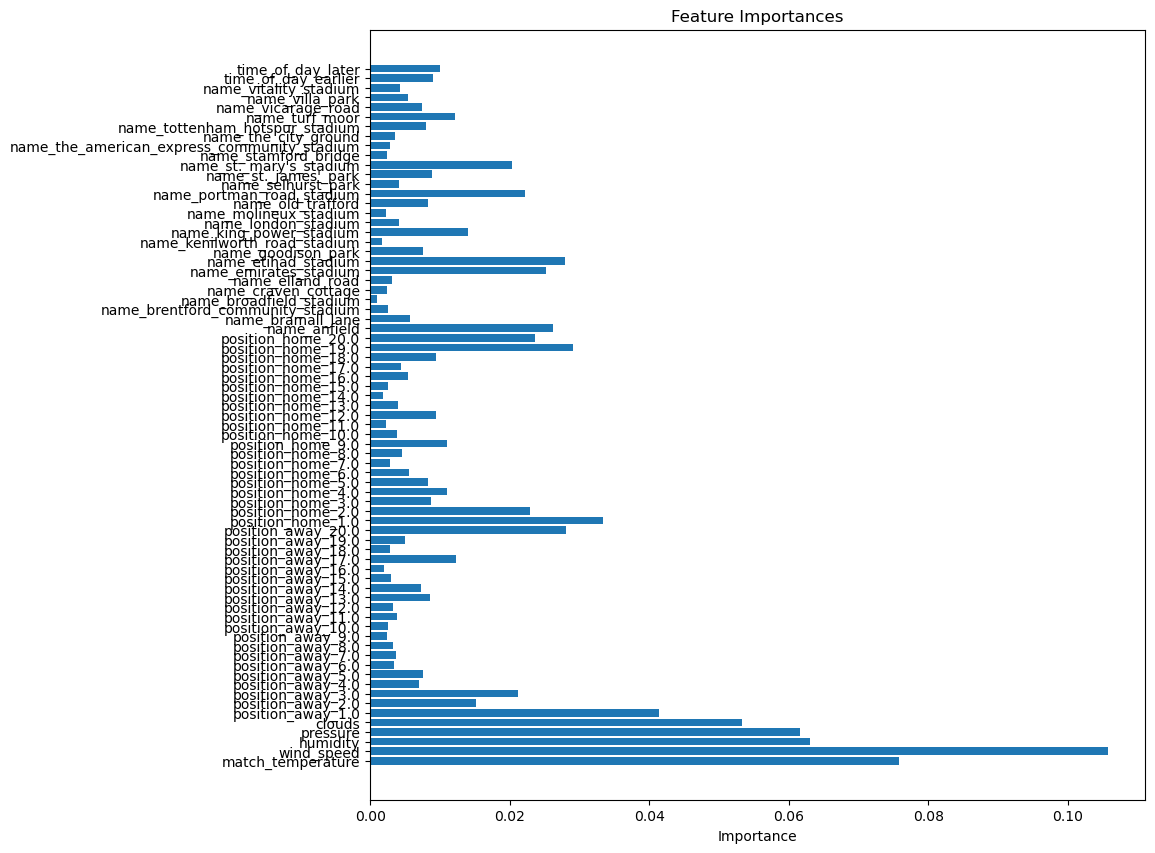

In [224]:
numeric_features = ['match_temperature', 'wind_speed',	'humidity',	'pressure',	'clouds']

categorical_features = ['position_away', 'position_home', 'name', 'time_of_day']

# Get feature importances
importances = model_rf.named_steps['classifier'].feature_importances_
# Get feature names after OneHotEncoding
feature_names = numeric_features + (model_rf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features).tolist())

# Plot feature importances
plt.figure(figsize=(10, 10))
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

### Use the Random Forest Model because feature importances are more balanced and it had a higher f1-score

In [ ]:
# joblib.dump(model_rf, "../src/eplmatches5ymodel_rf.pkl")

['../src/eplmatches5ymodel_rf.pkl']

In [226]:
team_goals_imp = joblib.load("../src/eplmatches5ymodel_rf.pkl")

In [227]:
team_goals_imp.predict_proba(X_test)[:,0]

c:\Users\vchan\Documents\ddi_course\assignments\capstone\soccer_predictor_app\src\preprocessing_utils.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(lambda x: x.lower().replace(" ", "_") if isinstance(x, str) else x)


array([0.52767458, 0.34602726, 0.56417748, 0.51010297, 0.49159748,
       0.66451967, 0.35865838, 0.58741763, 0.57607409, 0.49697963,
       0.46207655, 0.77718948, 0.63516231, 0.45384571, 0.56848623,
       0.46293411, 0.45727415, 0.3127239 , 0.56074347, 0.58786957,
       0.54158491, 0.55208421, 0.47518059, 0.59728776, 0.61202632,
       0.54321387, 0.79077784, 0.41400465, 0.44743652, 0.29619761,
       0.26677462, 0.38351393, 0.47885415, 0.40891047, 0.59200258,
       0.50099132, 0.53830454, 0.24680753, 0.53483118, 0.71939899,
       0.53568224, 0.42511218, 0.55270597, 0.54832268, 0.48849902,
       0.7326171 , 0.37297504, 0.43246587, 0.66856147, 0.4072459 ,
       0.74894204, 0.64377667, 0.50588473, 0.41857182, 0.5425834 ,
       0.313276  , 0.40111085, 0.4791094 , 0.64269006, 0.38481811,
       0.51667098, 0.86280223, 0.3038109 , 0.42462472, 0.44955582,
       0.60651616, 0.46058138, 0.42546338, 0.41557857, 0.49405158,
       0.54264576, 0.56071787, 0.60504406, 0.66228888, 0.50383

2025-04-19 09:14:41.929 
  command:

    streamlit run c:\Users\vchan\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

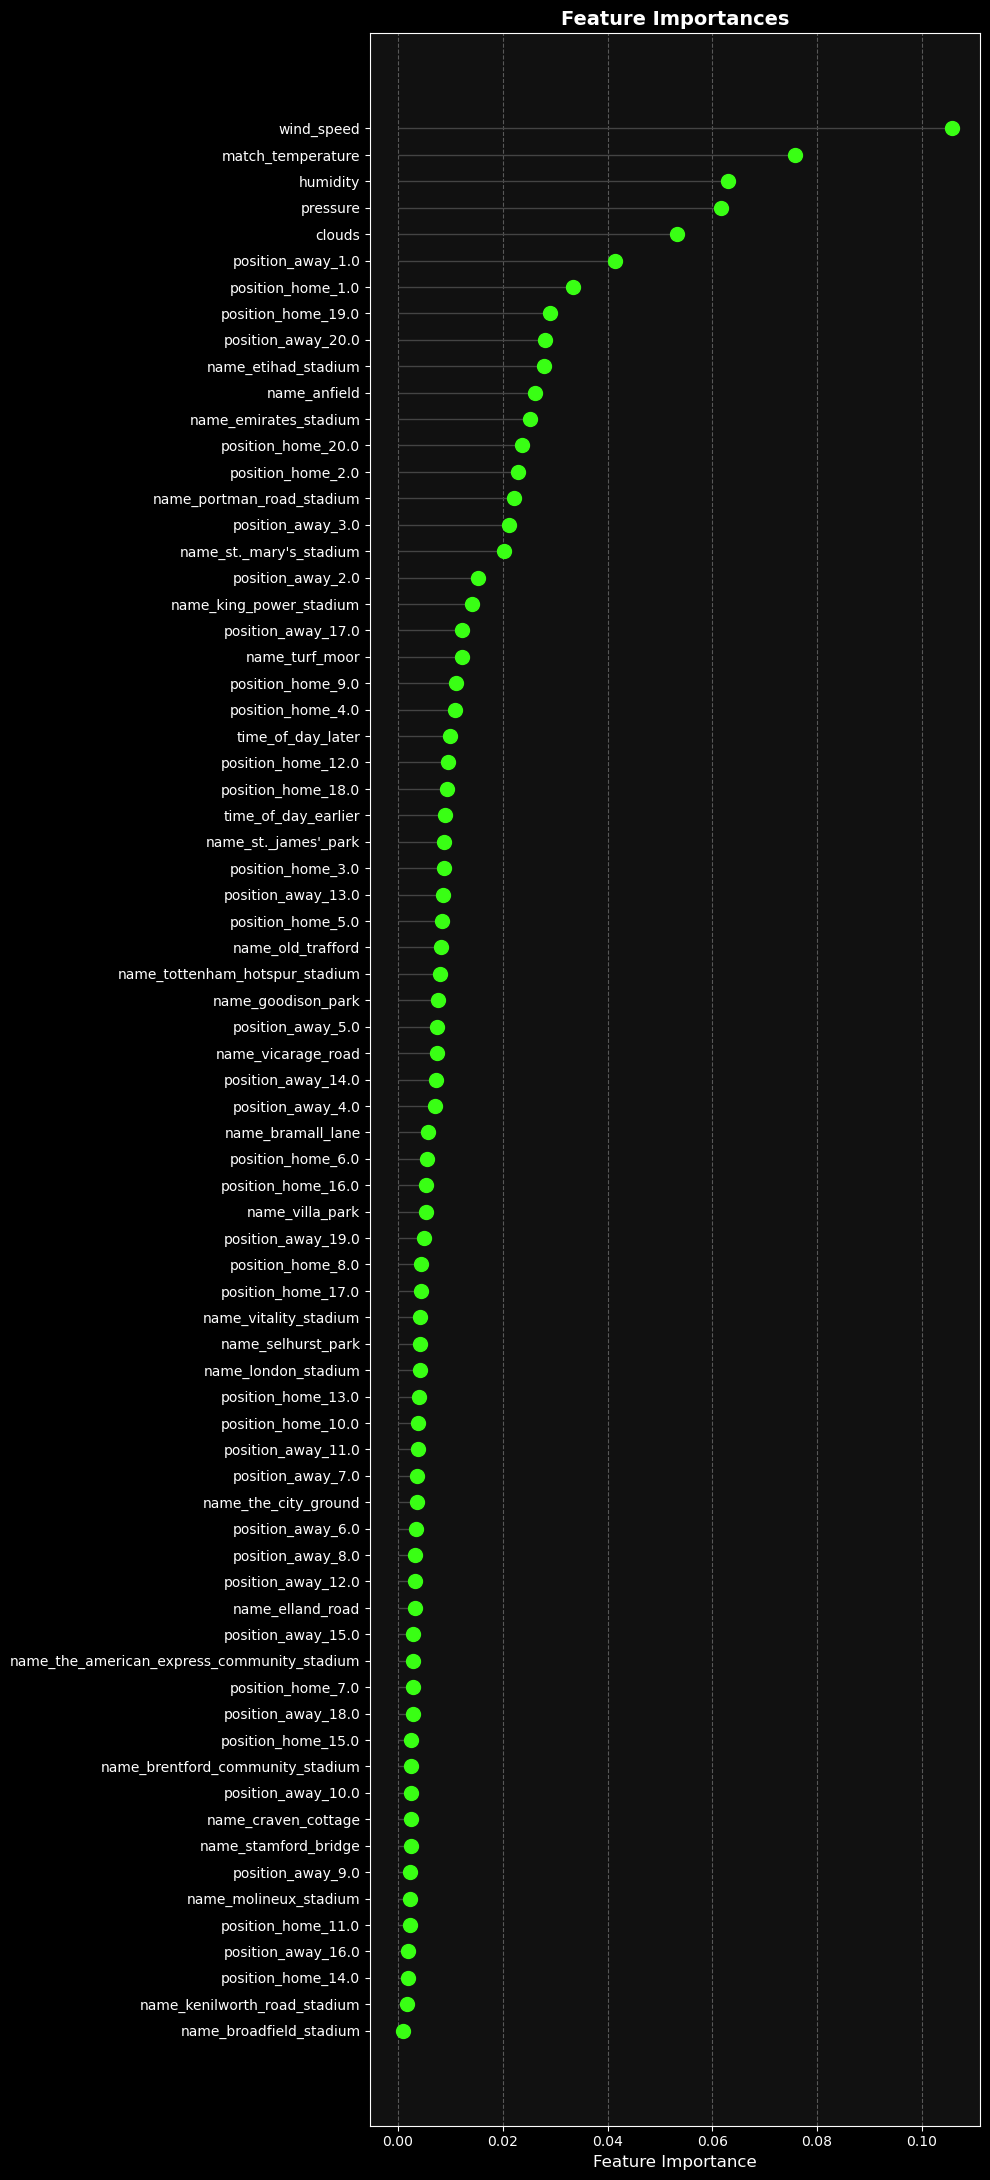

In [228]:
# Sort by importance
sorted_idx = np.argsort(importances)
sorted_importances = importances[sorted_idx]
sorted_features = [feature_names[i] for i in sorted_idx]

# Dark mode styling
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, len(sorted_features) * 0.3))
ax.set_facecolor('#111111')  # darker pitch background

# Draw lollipop chart
ax.hlines(y=sorted_features, xmin=0, xmax=sorted_importances, color='#444', linewidth=1)
ax.plot(sorted_importances, sorted_features, "o", markersize=10, color='#39ff14')  # neon green

# Axes and labels
ax.set_xlabel("Feature Importance", fontsize=12, color='white')
ax.set_title("Feature Importances", fontsize=14, color='white', weight='bold')
ax.tick_params(colors='white', labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.3, color='white')
fig.tight_layout()

# Streamlit:
st.pyplot(fig)

In [229]:
X_train.dtypes

position_away        float64
position_home        float64
match_temperature    float64
wind_speed           float64
humidity             float64
pressure             float64
clouds               float64
name                  object
time_of_day           object
dtype: object

In [230]:
list = X_train['name'].to_list()
pd.unique(list)

C:\Users\vchan\AppData\Local\Temp\ipykernel_33112\3671772825.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique(list)


array(['Selhurst Park', 'Tottenham Hotspur Stadium', 'Anfield',
       'Goodison Park', 'Portman Road Stadium', 'The City Ground',
       'Emirates Stadium', "St. James' Park", 'London Stadium',
       'Turf Moor', 'Molineux Stadium', 'Old Trafford', 'Bramall Lane',
       'Craven Cottage', 'Etihad Stadium',
       'The American Express Community Stadium',
       'Kenilworth Road Stadium', 'Broadfield Stadium', 'Villa Park',
       'Vitality Stadium', 'Brentford Community Stadium',
       'King Power Stadium', 'Vicarage Road', 'Stamford Bridge',
       "St. Mary's Stadium", 'Elland Road'], dtype=object)

In [231]:
list = np.arange(1,20,1).astype(float)
list

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.])

In [232]:
list.dtype

dtype('float64')

In [233]:
X_train['humidity'].max()

100.0

In [234]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 288 to 790
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   position_away      906 non-null    float64
 1   position_home      906 non-null    float64
 2   match_temperature  906 non-null    float64
 3   wind_speed         906 non-null    float64
 4   humidity           906 non-null    float64
 5   pressure           906 non-null    float64
 6   clouds             906 non-null    float64
 7   name               906 non-null    object 
 8   time_of_day        906 non-null    object 
dtypes: float64(7), object(2)
memory usage: 70.8+ KB


In [235]:
X.name

0                               London Stadium
1                                 Old Trafford
2                           King Power Stadium
3                  Brentford Community Stadium
4                              St. James' Park
                         ...                  
1514                                   Anfield
1515                           Stamford Bridge
1516                        King Power Stadium
1517               Brentford Community Stadium
1518    The American Express Community Stadium
Name: name, Length: 1133, dtype: object